In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
data = pd.read_csv('non_zero_data.csv')
data.head()

,adult,genre_ids,id,original_language,popularity,release_date,title,vote_average,vote_count,revenue,production_companies,budget,release_year,release_month,num_genres,release_season,budget_revenue_ratio
0,False,"[18, 80]",278,en,136.776,1994-09-23,The Shawshank Redemption,8.704,25822,28341469.0,['Castle Rock Entertainment'],25000000.0,1994,9,2,Fall,0.882100
1,False,"[18, 80]",238,en,107.889,1972-03-14,The Godfather,8.695,19602,245066411.0,"['Paramount', 'Alfran Productions']",6000000.0,1972,3,2,Spring,0.024483
2,False,"[18, 80]",240,en,71.355,1974-12-20,The Godfather Part II,8.576,11849,102600000.0,"['Paramount', 'The Coppola Company']",13000000.0,1974,12,2,Winter,0.126706
3,False,"[18, 36, 10752]",424,en,79.614,1993-12-15,Schindler's List,8.566,15229,321365567.0,['Amblin Entertainment'],22000000.0,1993,12,3,Winter,0.068458
4,False,"[16, 10751, 14]",129,ja,120.883,2001-07-20,Spirited Away,8.541,15705,274925095.0,['Studio Ghibli'],19000000.0,2001,7,3,Summer,0.069110


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5745 entries, 0 to 5744
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   adult                 5745 non-null   bool   
 1   genre_ids             5745 non-null   object 
 2   id                    5745 non-null   int64  
 3   original_language     5745 non-null   object 
 4   popularity            5745 non-null   float64
 5   release_date          5745 non-null   object 
 6   title                 5745 non-null   object 
 7   vote_average          5745 non-null   float64
 8   vote_count            5745 non-null   int64  
 9   revenue               5745 non-null   float64
 10  production_companies  5745 non-null   object 
 11  budget                5745 non-null   float64
 12  release_year          5745 non-null   int64  
 13  release_month         5745 non-null   int64  
 14  num_genres            5745 non-null   int64  
 15  release_season       

In [4]:
data.describe()

,id,popularity,vote_average,vote_count,revenue,budget,release_year,release_month,num_genres,budget_revenue_ratio
count,5.745000e+03,5745.000000,5745.000000,5745.000000,5.745000e+03,5.745000e+03,5745.000000,5745.000000,5745.000000,5745.000000
mean,1.295379e+05,35.501507,6.630684,2706.511923,1.091273e+08,3.628044e+07,2003.085988,7.044560,2.684595,68.181639
std,2.033229e+05,38.159271,0.774388,3668.241251,1.928114e+08,4.461550e+07,15.639287,3.390513,1.014903,4543.623542
min,5.000000e+00,0.600000,2.899000,300.000000,2.000000e+00,5.000000e+00,1915.000000,1.000000,1.000000,0.000241
25%,8.832000e+03,20.756000,6.122000,639.000000,1.323146e+07,8.000000e+06,1996.000000,4.000000,2.000000,0.222150
50%,1.349700e+04,27.424000,6.644000,1344.000000,4.270000e+07,2.000000e+07,2007.000000,7.000000,3.000000,0.444435
75%,2.079320e+05,39.597000,7.182000,3125.000000,1.197000e+08,4.500000e+07,2014.000000,10.000000,3.000000,1.013088
max,1.160164e+06,1398.123000,8.704000,35429.000000,2.923706e+09,4.600000e+08,2024.000000,12.000000,7.000000,344112.500000


# Converting categorical to numeric
Using onehotenconder and labelencoder, to convert categorical a numeric value. This is done for correlation.

In [5]:
# Import the encoder from sklearn
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

# OneHotEncoding of categorical predictors (not the response)
data_cat = data[['original_language','release_season']]
ohe.fit(data_cat)
data_cat_ohe = pd.DataFrame(ohe.transform(data_cat).toarray(), 
                                  columns=ohe.get_feature_names_out(data_cat.columns))

from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to 'production_companies' column
data['production_companies_numeric'] = label_encoder.fit_transform(data['production_companies'])

# Drop the original'production_companies' column
data.drop(columns=['production_companies'], inplace=True)

data.head()

,adult,genre_ids,id,original_language,popularity,release_date,title,vote_average,vote_count,revenue,budget,release_year,release_month,num_genres,release_season,budget_revenue_ratio,production_companies_numeric
0,False,"[18, 80]",278,en,136.776,1994-09-23,The Shawshank Redemption,8.704,25822,28341469.0,25000000.0,1994,9,2,Fall,0.882100,741
1,False,"[18, 80]",238,en,107.889,1972-03-14,The Godfather,8.695,19602,245066411.0,6000000.0,1972,3,2,Spring,0.024483,3025
2,False,"[18, 80]",240,en,71.355,1974-12-20,The Godfather Part II,8.576,11849,102600000.0,13000000.0,1974,12,2,Winter,0.126706,3177
3,False,"[18, 36, 10752]",424,en,79.614,1993-12-15,Schindler's List,8.566,15229,321365567.0,22000000.0,1993,12,3,Winter,0.068458,251
4,False,"[16, 10751, 14]",129,ja,120.883,2001-07-20,Spirited Away,8.541,15705,274925095.0,19000000.0,2001,7,3,Summer,0.069110,3889


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5745 entries, 0 to 5744
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   adult                         5745 non-null   bool   
 1   genre_ids                     5745 non-null   object 
 2   id                            5745 non-null   int64  
 3   original_language             5745 non-null   object 
 4   popularity                    5745 non-null   float64
 5   release_date                  5745 non-null   object 
 6   title                         5745 non-null   object 
 7   vote_average                  5745 non-null   float64
 8   vote_count                    5745 non-null   int64  
 9   revenue                       5745 non-null   float64
 10  budget                        5745 non-null   float64
 11  release_year                  5745 non-null   int64  
 12  release_month                 5745 non-null   int64  
 13  num

In [7]:
# Filter out numeric columns
numeric_data = data.select_dtypes(include=['number'])

#combine ohe data and numeric data
dfcat = pd.concat([data_cat_ohe, numeric_data], 
                           sort = False, axis = 1)

# Which variable is the top predictor of popularity?
Looking at numeric data relation with ratings. what are the top 10 predictor with the highest correlation with popularity?

In [8]:
correlation = dfcat.corr()['popularity'].abs().sort_values(ascending=False)

# Compute the correlation matrix
correlation_matrix = dfcat.corr()

# Sort the correlations with 'vote_average' in descending order
vote_average_correlation = correlation_matrix['popularity'].sort_values(ascending=False)[1:11]
# Display the top predictors of 'vote_average'
print("Top predictors of popularity: \n")
print(vote_average_correlation)

Top predictors of popularity: 

revenue                         0.383219
vote_count                      0.375725
budget                          0.363796
id                              0.258846
vote_average                    0.193538
release_year                    0.166257
num_genres                      0.100402
original_language_en            0.088680
original_language_ja            0.035710
production_companies_numeric    0.035571
Name: popularity, dtype: float64


# Model training.

Explore and determine which model is suitable for this regression problem. Using Multi-Variate linear regression model with the 3 most suitable predictor: revenue, vote_count, budget, vote average, release_year, num_genre

# Model 1: Linear Regression

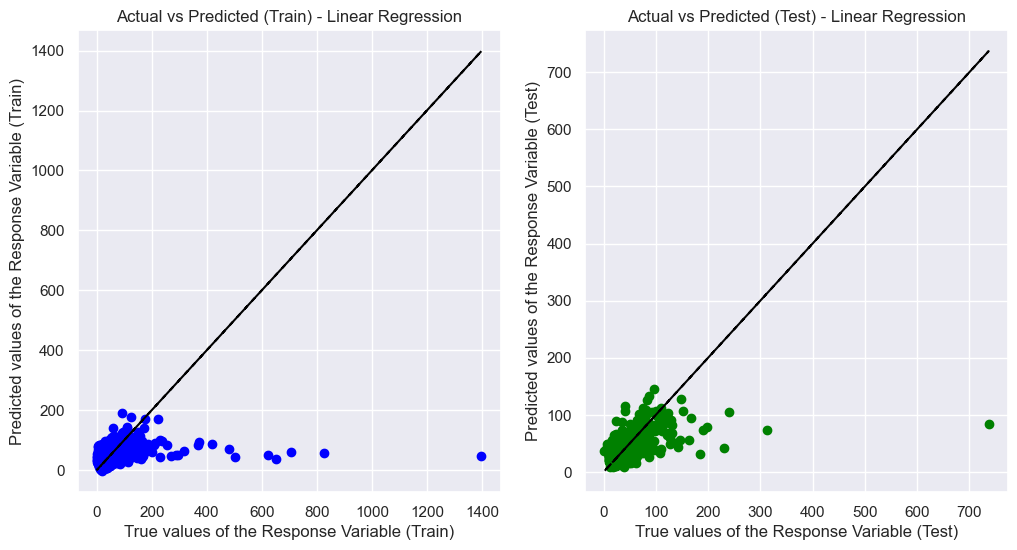

Linear Regression:
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.18450415192883807
Mean Squared Error (MSE) 	: 1324.496642170625

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.3232447116459567
Mean Squared Error (MSE) 	: 643.526188967651



In [9]:
# linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

predictors = ["revenue", "vote_count", "budget","vote_average","release_year","num_genres"]

# Extract predictors and response variable
X = pd.DataFrame(data[predictors])
y = pd.DataFrame(data['popularity'])

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Initialize and train Linear Regression model
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# Predictions
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)


# Plot actual vs predicted values for Linear Regression
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, color='blue')
plt.plot(y_train, y_train, color='black', linestyle='--')
plt.xlabel('True values of the Response Variable (Train)')
plt.ylabel('Predicted values of the Response Variable (Train)')
plt.title('Actual vs Predicted (Train) - Linear Regression')

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, color='green')
plt.plot(y_test, y_test, color='black', linestyle='--')
plt.xlabel('True values of the Response Variable (Test)')
plt.ylabel('Predicted values of the Response Variable (Test)')
plt.title('Actual vs Predicted (Test) - Linear Regression')

plt.show()

# Check the Goodness of Fit (on Train Data)
print("Linear Regression:")
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

# Model 2: Decision Tree Regressor

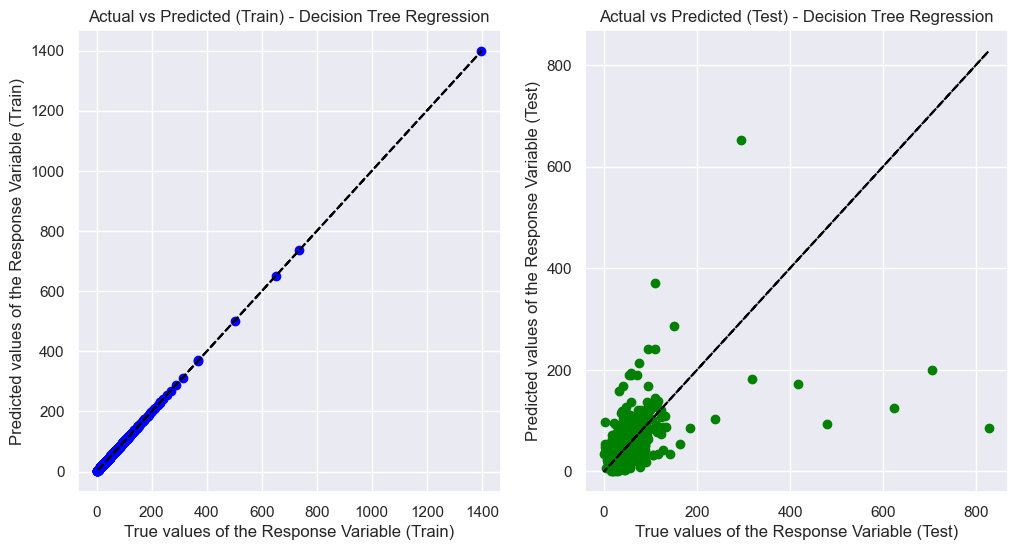

Decision Tree Regression:
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 1.0
Mean Squared Error (MSE) 	: 0.0

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.17573935180132805
Mean Squared Error (MSE) 	: 1465.8265157884484



In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

predictors = ["revenue", "vote_count", "budget","vote_average","release_year","num_genres"]

# Extract predictors and response variable
X = pd.DataFrame(data[predictors])
y = pd.DataFrame(data['popularity'])

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Initialize and train Linear Regression model
dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train, y_train)

# Predictions
y_train_pred = dt_reg.predict(X_train)
y_test_pred = dt_reg.predict(X_test)


# Plot actual vs predicted values for Linear Regression
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, color='blue')
plt.plot(y_train, y_train, color='black', linestyle='--')
plt.xlabel('True values of the Response Variable (Train)')
plt.ylabel('Predicted values of the Response Variable (Train)')
plt.title('Actual vs Predicted (Train) - Decision Tree Regression')

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, color='green')
plt.plot(y_test, y_test, color='black', linestyle='--')
plt.xlabel('True values of the Response Variable (Test)')
plt.ylabel('Predicted values of the Response Variable (Test)')
plt.title('Actual vs Predicted (Test) - Decision Tree Regression')

plt.show()

# Check the Goodness of Fit (on Train Data)
print("Decision Tree Regression:")
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", dt_reg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", dt_reg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

# Model 3: Random Forest Regressor

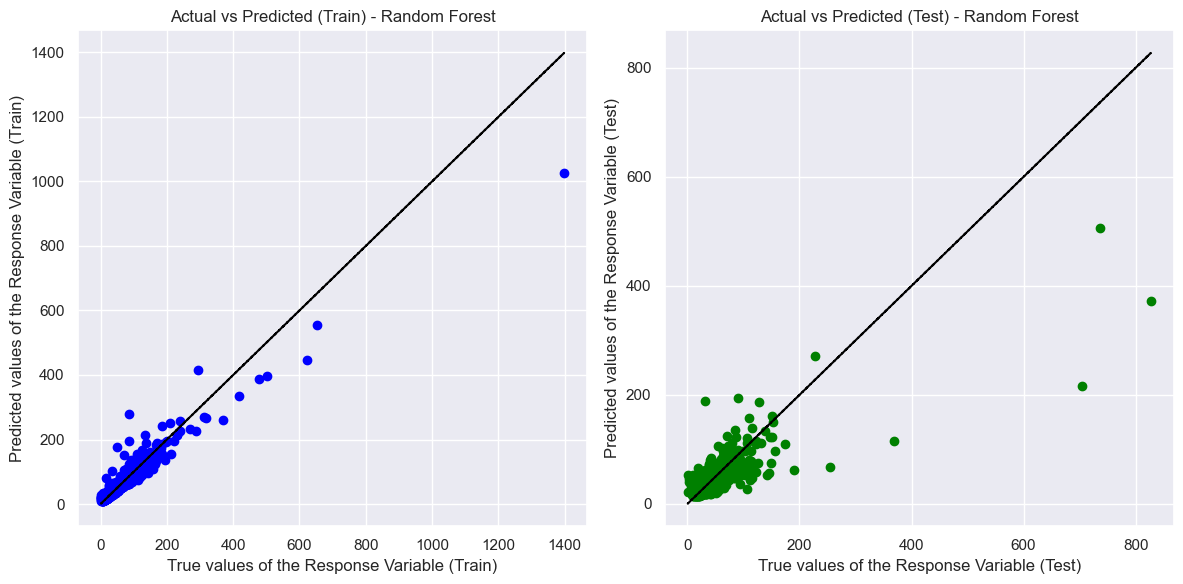

Random Forest Regression:
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9202340008618947
Mean Squared Error (MSE) 	: 108.7643546896495

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.636865503766082
Mean Squared Error (MSE) 	: 628.0983194432202



In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Assuming data is your DataFrame containing the data
predictors = ["revenue", "vote_count", "budget","vote_average","release_year","num_genres"]

# Extract predictors and response variable
X = data[predictors]
y = data['popularity']

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initialize and train Random Forest Regression model
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)

# Predictions
y_train_pred_rf = rf_reg.predict(X_train)
y_test_pred_rf = rf_reg.predict(X_test)


# Plot actual vs predicted values for Random Forest
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred_rf, color='blue')
plt.plot(y_train, y_train, color='black', linestyle='--')
plt.xlabel('True values of the Response Variable (Train)')
plt.ylabel('Predicted values of the Response Variable (Train)')
plt.title('Actual vs Predicted (Train) - Random Forest')

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred_rf, color='green')
plt.plot(y_test, y_test, color='black', linestyle='--')
plt.xlabel('True values of the Response Variable (Test)')
plt.ylabel('Predicted values of the Response Variable (Test)')
plt.title('Actual vs Predicted (Test) - Random Forest')

plt.tight_layout()
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Random Forest Regression:")
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", r2_score(y_train, y_train_pred_rf))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred_rf))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", r2_score(y_test, y_test_pred_rf))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred_rf))
print()

We can see that in test dataset, Random Forest Regressor has the highest explained variance while having lowest Mean Squared Error. Decision tree model was the worst out of the 3. 

While Linear regression accuracy is almost the same as Random forest,for linear regression, results can be compromised we include too many variables. in this case 6.

Randomforest benefits

Low Overfitting Risk:
Random forests reduce the risk of overfitting since they create multiple independent decision trees that are unlikely to all make the same mistake. It helps ensure the model is more generalizable and can accurately classify data points it has never seen before.

Robustness:
Random forests are resilient to noise in the data, meaning they will continue producing accurate results despite variable inputs or corrupted data points. It makes them an ideal choice when working with real-world datasets where there may be gaps or errors in the input values.


Therefore, Random Forest Reression is the better model and is more suitable.

# Prediction of Popularity
Can we predict the popularity value of movies using the Regression Model derived above?
Predict the popularity of the movie "Furious 7", "Out of Time", and "Superbad"

In [13]:
movie_ratings_pred = data[data["title"].isin(["Furious 7", "Out of Time", "Superbad"])]
movie_ratings_pred

,adult,genre_ids,id,original_language,popularity,release_date,title,vote_average,vote_count,revenue,budget,release_year,release_month,num_genres,release_season,budget_revenue_ratio,production_companies_numeric,cluster
1299,False,[35],8363,en,55.458,2007-03-20,Superbad,7.241,6931,1.708000e+08,20000000.0,2007,3,1,Spring,0.117096,861,2
1311,False,"[28, 53, 80]",168259,en,72.224,2015-04-01,Furious 7,7.235,10251,1.515400e+09,190000000.0,2015,4,3,Spring,0.125379,2933,1
3776,False,"[53, 80, 18]",2116,en,22.758,2003-10-03,Out of Time,6.325,1101,5.549556e+07,50000000.0,2003,10,3,Fall,0.900973,2621,0


In [14]:
# Extract Predictors for Prediction
X_pred = pd.DataFrame(movie_ratings_pred[predictors])

# Predict Response corresponding to Predictors
y_pred = rf_reg.predict(X_pred)
y_pred

array([52.04393, 66.5479 , 23.2607 ])

In [15]:
# Summarize the Actuals, Predictions and Errors
y_pred = pd.DataFrame(y_pred, columns=["Pred_Popularity"], index=movie_ratings_pred.index)
moviedata_acc = pd.concat([movie_ratings_pred[["title", "popularity"]], y_pred], axis=1)

y_errs = 100*abs(movie_ratings_pred["popularity"] - y_pred["Pred_Popularity"]) / movie_ratings_pred["popularity"]
y_errs = pd.DataFrame(y_errs, columns=["Error_percentage"], index=movie_ratings_pred.index)
moviedata_acc = pd.concat([moviedata_acc, y_errs], axis=1)

moviedata_acc

,title,popularity,Pred_Popularity,Error_percentage
1299,Superbad,55.458,52.04393,6.156136
1311,Furious 7,72.224,66.54790,7.859022
3776,Out of Time,22.758,23.26070,2.208894


The model predicted popularity of 3 movies rather accurately with variable "revenue", "vote_count", and "budget","release_year","num_genres". The error highest error as shown is 7.86% off the actual value.Therefore to predict any movie poplarity this model is suitable.